# Table of Conents 

#### 1. Import Libraries and Data
#### 2. Clean/Reprocessing Data
#### 3. Using Elbow Technique to Find Ideal # of Clusters
#### 4. Run k-means Algorithm
#### 5. Create scatterplots
#### 6. Future Analysis Steps

## 1. Import Libraries and Data


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl

In [2]:
#setting the path for data set import
path = r'/Users/davesmac/Desktop/Achievement 6'

In [3]:
df_routes = pd.read_excel(os.path.join(path, 'climbing_routes_clean.xlsx'))

In [4]:
df_routes.head()

,Unnamed: 0,Route_Name,Location,Area,Region,State,Avg Stars,Route_Type,Route_Subtype,Rating,Rating_Subtype,Pitches,Length,Latitude,Longitude,Coordinates,URL,Rating Category,Length Category
0,0,What's My Line?,Cochise Dome (What's My Line Dome) > East Stro...,Cochise Stronghold,Southern Arizona,Arizona,3.7,Trad,Aid,6,A0 R,3,400,31.92900,-109.98167,"('31.929', '-109.98167')",https://www.mountainproject.com/route/10573837...,Easy Route,Medium Route
1,1,Hanging Gardens,Gardener's Wall > McDowell Mountains > **Phoen...,**Phoenix Areas,Central Arizona,Arizona,3.3,Trad,None,6,NaN,2,188,33.68178,-111.80737,"('33.68178', '-111.80737')",https://www.mountainproject.com/route/10587937...,Easy Route,NaN
2,2,East Face,The Praying Monk > Camelback Mountain > **Phoe...,**Phoenix Areas,Central Arizona,Arizona,3.0,Sport,None,6,NaN,1,80,33.51450,-111.96180,"('33.5145', '-111.9618')",https://www.mountainproject.com/route/10580135...,Easy Route,Short Route
3,3,Southeast Arete,East Face > Baboquivari Peak > Southern Arizon...,Baboquivari Peak,Southern Arizona,Arizona,3.3,Trad,None,6,NaN,6,650,31.77129,-111.59357,"('31.77129', '-111.59357')",https://www.mountainproject.com/route/10614707...,Easy Route,NaN
4,4,Razor's Edge,The Hand > Northwest Pinnacles > Superstition ...,**Phoenix Areas,Central Arizona,Arizona,2.7,Trad,None,6,NaN,3,250,33.45235,-111.45936,"('33.45235', '-111.45936')",https://www.mountainproject.com/route/10580806...,Easy Route,Medium Route


## 2. Clean/Reprocessing Data

In [5]:
# Remove categorical columns
df_routes = df_routes.drop(columns = ['Unnamed: 0','Route_Name', 'Location', 'Area', 'Region', 'State', 'Route_Type', 'Route_Subtype', 'Rating_Subtype', 'Coordinates', 'URL', 'Rating Category', 'Length Category'])

In [6]:
df_routes.head()

,Avg Stars,Rating,Pitches,Length,Latitude,Longitude
0,3.7,6,3,400,31.92900,-109.98167
1,3.3,6,2,188,33.68178,-111.80737
2,3.0,6,1,80,33.51450,-111.96180
3,3.3,6,6,650,31.77129,-111.59357
4,2.7,6,3,250,33.45235,-111.45936


## 3. Using Elbow Technique to Find Ideal # of Clusters

In [7]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [9]:
score = [kmeans[i].fit(df_routes).score(df_routes) for i in range(len(kmeans))]

score

[-2392434332.4833937,
 -877214789.6689637,
 -435051428.03426313,
 -267868249.38741082,
 -182155612.29215524,
 -135358647.34175584,
 -102017432.39516237,
 -82485862.99488585,
 -63108933.5333438]

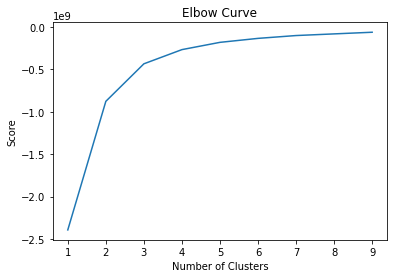

In [10]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### Optimal count of clusters is 4. I chose 4 because the curve really starts to taper off after 4. It is very steep from 1-2, then fairly steep from 2-4, before flattening out after 4. 

## 4. Run k-means Algorithm

In [22]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4, n_jobs = -1) 

In [23]:
# Fit the k-means object to the data.

kmeans.fit(df_routes)

C:\Users\DavidBennett\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=4, n_jobs=-1)

In [24]:
# Create new column for cluster groupings 
df_routes['cluster'] = kmeans.fit_predict(df_routes)

C:\Users\DavidBennett\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [25]:
df_routes.head()

,Avg Stars,Rating,Pitches,Length,Latitude,Longitude,cluster
0,3.7,6,3,400,31.92900,-109.98167,2
1,3.3,6,2,188,33.68178,-111.80737,0
2,3.0,6,1,80,33.51450,-111.96180,0
3,3.3,6,6,650,31.77129,-111.59357,2
4,2.7,6,3,250,33.45235,-111.45936,2


In [26]:
df_routes['cluster'].value_counts()

0    68049
2     5164
1     1186
3      281
Name: cluster, dtype: int64

## 5. Create scatterplots

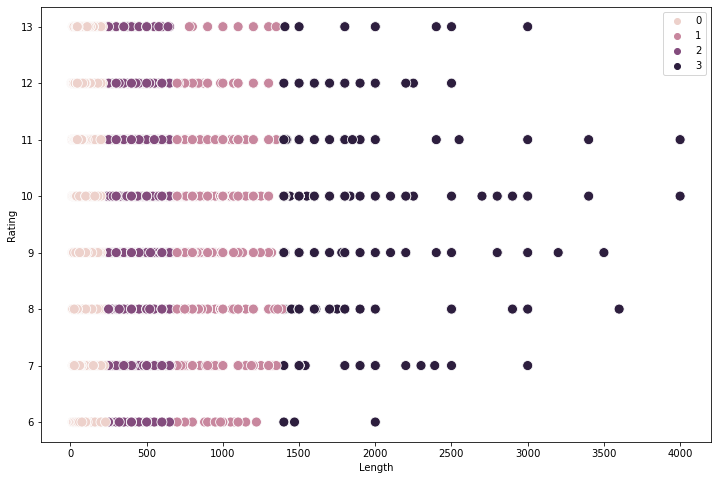

In [27]:
# Plot the clusters for the "Length" and "Rating" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_routes['Length'], y=df_routes['Rating'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Length') # Label x-axis.
plt.ylabel('Rating') # Label y-axis.
plt.show()

#### This visual helps to show the length of routes by grade.  Here I can see that while there is a pretty even distribution of short and moderate length (<1500 ft), there are more longer routes (>1500) in the 5.9- 5.10 ratings (note- I've removed the '5.' to ratings for analysis, but that relates to a specific grading system). 

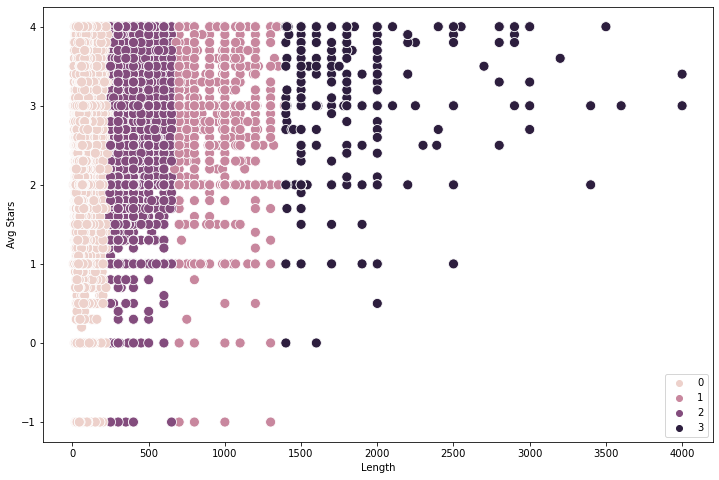

In [28]:
# Plot the clusters for the "Length" and "Avg Stars" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_routes['Length'], y=df_routes['Avg Stars'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Length') # Label x-axis.
plt.ylabel('Avg Stars') # Label y-axis.
plt.show()

#### Here, this visual is showing avg stars by length. I had done some analysis of these variables earlier, and this further supports my hypothsis in that longer routes on average, get more stars.  Looking at clusters 1 and 3, I see that routes over 750 ft or so get more stars on average than shorter routes. 

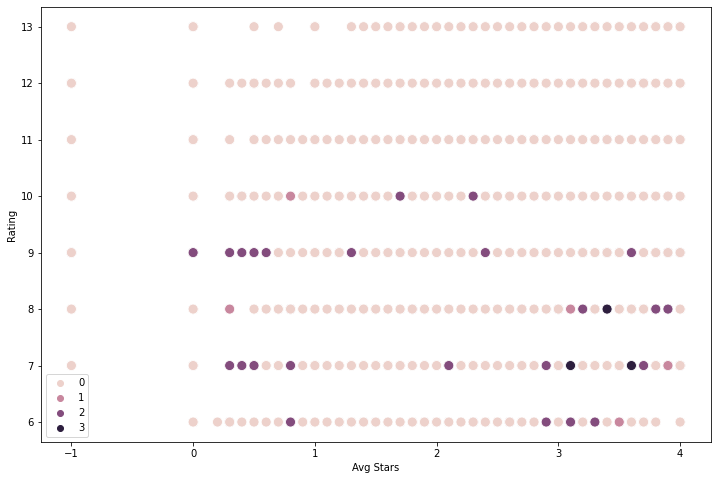

In [29]:
# Plot the clusters for the "Avg Stars" and "Rating" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_routes['Avg Stars'], y=df_routes['Rating'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Avg Stars') # Label x-axis.
plt.ylabel('Rating') # Label y-axis.
plt.show()

#### I had looked at these variables previously using a supervised machine learning model to test my hypothesis that the higher the rating, the more avg stars a route receives. While there were initially trends supporting this, the model was ultimately determined to not be a good fit.  This visual is not showing any trend/correlation between a routes rating and average stars.

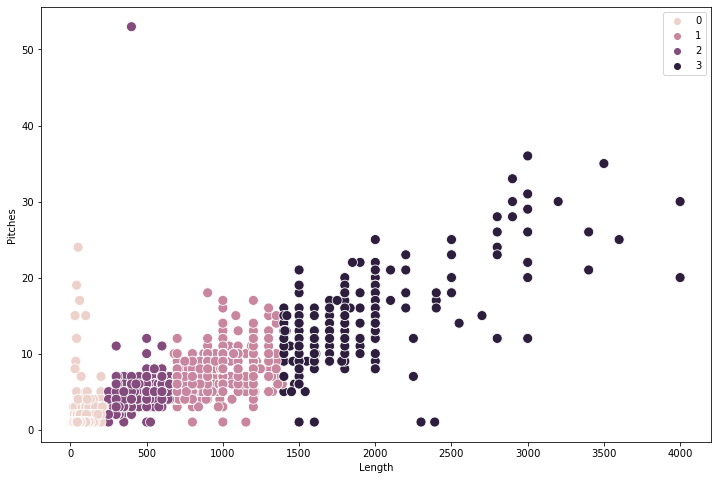

In [30]:
# Plot the clusters for the "Pitches" and "Length" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_routes['Length'], y=df_routes['Pitches'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Length') # Label x-axis.
plt.ylabel('Pitches') # Label y-axis.
plt.show()

#### I looked at these two variables (# of Pitches and Length) mostly to see what the visual would look like using variables that have a strong positive correlation. From past analysis, I already knew that there was a very strong correlation between pitches and route length.  This definitely reaffirms that. This comparison can also help me better define my 'Length Category' column.  I believe I had originally defined a 'long route' as over 1000ft. I may alter that to define it as over 1500ft based on these clusters.

In [32]:
#label cluster categories 
df_routes.loc[df_routes['cluster'] == 3, 'cluster'] = 'black'
df_routes.loc[df_routes['cluster'] == 2, 'cluster'] = 'dark purple'
df_routes.loc[df_routes['cluster'] == 1, 'cluster'] = 'purple'
df_routes.loc[df_routes['cluster'] == 0, 'cluster'] = 'pink'

In [33]:
df_routes.head()

,Avg Stars,Rating,Pitches,Length,Latitude,Longitude,cluster
0,3.7,6,3,400,31.92900,-109.98167,dark purple
1,3.3,6,2,188,33.68178,-111.80737,pink
2,3.0,6,1,80,33.51450,-111.96180,pink
3,3.3,6,6,650,31.77129,-111.59357,dark purple
4,2.7,6,3,250,33.45235,-111.45936,dark purple


In [34]:
#Calculate descriptive stats by cluster
df_routes.groupby('cluster').agg({'Avg Stars':['mean', 'median'], 
                         'Rating':['mean', 'median'], 
                         'Pitches':['mean', 'median'],
                          'Length':['mean', 'median']})

Avg Stars           Rating           Pitches              Length  \
                 mean median      mean median       mean median         mean   
cluster                                                                        
black        3.053025    3.0  9.850534   10.0  14.056940   13.0  1861.444840   
dark purple  2.667874    2.8  9.403757   10.0   3.624710    3.0   388.082494   
pink         2.474465    2.5  9.967670   10.0   1.073476    1.0    74.970889   
purple       2.835750    3.0  9.532040   10.0   7.478078    7.0   922.317032   

                     
             median  
cluster              
black        1700.0  
dark purple   370.0  
pink           70.0  
purple        900.0

#### These descriptive stats show me that between clusters, there is not much variance between avg stars and rating. However, there is quite a large difference in pitches and length. The black cluster has a median number of pitches of 13, while dark purple and pink have 3 and 1, respectively. This shows that the black (and to a lesser extent purple) clusters are much longer routes.

## 6. Future Analysis Steps: 

#### As stated, these findings can help me better determine certain categories (such as route length) to give a more accurate representation of the data.  This has also further helped answer a couple of my questions and prove/disprove some hypotheses.  